### Import the required libraries -

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold

print("Imported libraries!")

Imported libraries!


### Prepare training/testing data -

In [23]:
# Import MNIST dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

# Reshape the dataset
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# One-hot encode the values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Convert the pixel data into floats
trainX = trainX.astype('float32')
testX = testY.astype('float32')

# Normalize the pixel data
trainX = trainX / 255.0
testX = testX / 255.0


### Prepare the CNN model -

In [24]:
def makeCNNModel():
  cnnModel = Sequential()
  cnnModel.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  cnnModel.add(BatchNormalization())
  cnnModel.add(MaxPool2D(pool_size=(2, 2)))
  cnnModel.add(Flatten())
  cnnModel.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  cnnModel.add(BatchNormalization())
  cnnModel.add(Dense(10, activation='softmax'))

  optimizer = SGD(lr=0.01, momentum=0.9)
  cnnModel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return cnnModel


### Evaluate the model -

In [25]:
def evaluateCNNModel(dataX, dataY, nFolds = 5):
  cnnScores = list()
  cnnHistories = list()

  kFold = KFold(nFolds, shuffle=True, random_state=1)
  for train_ix, test_ix in kFold.split(dataX):
    # define
    curModel = makeCNNModel()
    # get training/testing data
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit the model
    curHistory = curModel.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
    # evaluate the model
    _, acc = curModel.evaluate(testX, testY, verbose=0)
    # store scores in lists
    cnnScores.append(acc)
    cnnHistories.append(curHistory)
  return cnnScores, cnnHistories


### Run and plot the evaluation results -

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2393 - accuracy: 0.9252 - val_loss: 0.0656 - val_accuracy: 0.9817
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9843 - val_loss: 0.0556 - val_accuracy: 0.9842
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0555 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.0519 - val_accuracy: 0.9855
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0526 - val_accuracy: 0.9853
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0555 - val_accuracy: 0.9847
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0603 - val_accuracy:

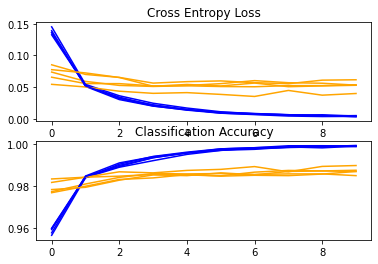

Accuracy: mean=98.720 std=0.155, n=5


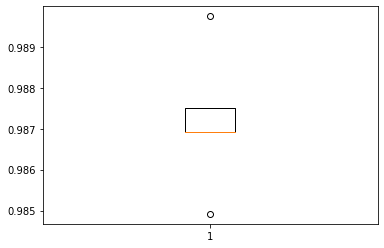

In [26]:
scores, histories = evaluateCNNModel(trainX, trainY)

for i, item in enumerate(histories):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(item.history['loss'], color='blue', label='train')
  plt.plot(item.history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(item.history['accuracy'], color='blue', label='train')
  plt.plot(item.history['val_accuracy'], color='orange', label='test')
plt.show()

print(f"Accuracy: mean={(np.mean(scores)*100):.3f} std={(np.std(scores)*100):.3f}, n={len(scores)}")
plt.boxplot(scores)
plt.show()